<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.2. Deep Learning SRNN</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

## Seleccionar que tipo de ejecucion se va a realizar:

## AUTOMATICA o MANUAL (por defecto AUTOMATICA).

In [15]:
# escribir entre parentesis AUTOMATICA o MANUAL

EJECUCION = "AUTOMATICA"

In [16]:
# en esta celda no ha de ser modificada 

if EJECUCION == "MANUAL":
    %run 3.Importaciones.ipynb

%run 4.VariablesClases.ipynb

In [17]:
datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

# RNN (Recurrent Neural Networks)

In [18]:

# Compilar el modelo
model_rnn = crear_modelo_RNN(TIMESTEPS, FEATURES, NUM_CLASES)


C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


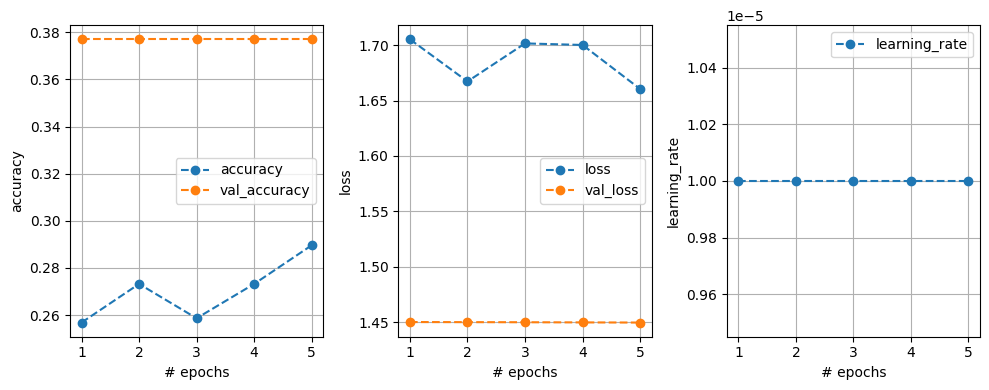

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2960 - loss: 1.6580 - val_accuracy: 0.3770 - val_loss: 1.4496 - learning_rate: 1.0000e-05
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [19]:

accuracy_score_rnn = []
accuracy_score_test_rnn =[]
matriz_confusion_rnn = []
matriz_confusion_test_rnn = []
total_rnn_trained = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
    
    X_train, X_val, X_test = reshapeo (X_train, X_val, X_test)
    
    # Entrenar el modelo
    rnn_trained = model_rnn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BACH_SIZE, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint_rnn, plot_learning])

    y_pred = model_rnn.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
        
    y_pred_test = model_rnn.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)
    

    accuracy_score_rnn.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_rnn.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_rnn.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_rnn.append(confusion_matrix(y_test, y_pred_classes_test))
    
    total_rnn_trained.append(rnn_trained)




,RNN_VAL
Segmento 1,0.333333
Segmento 2,0.333333
Segmento 3,0.333333
Segmento 4,0.166667
All Segmentos after,0.360656
All Segmentos before,0.377049


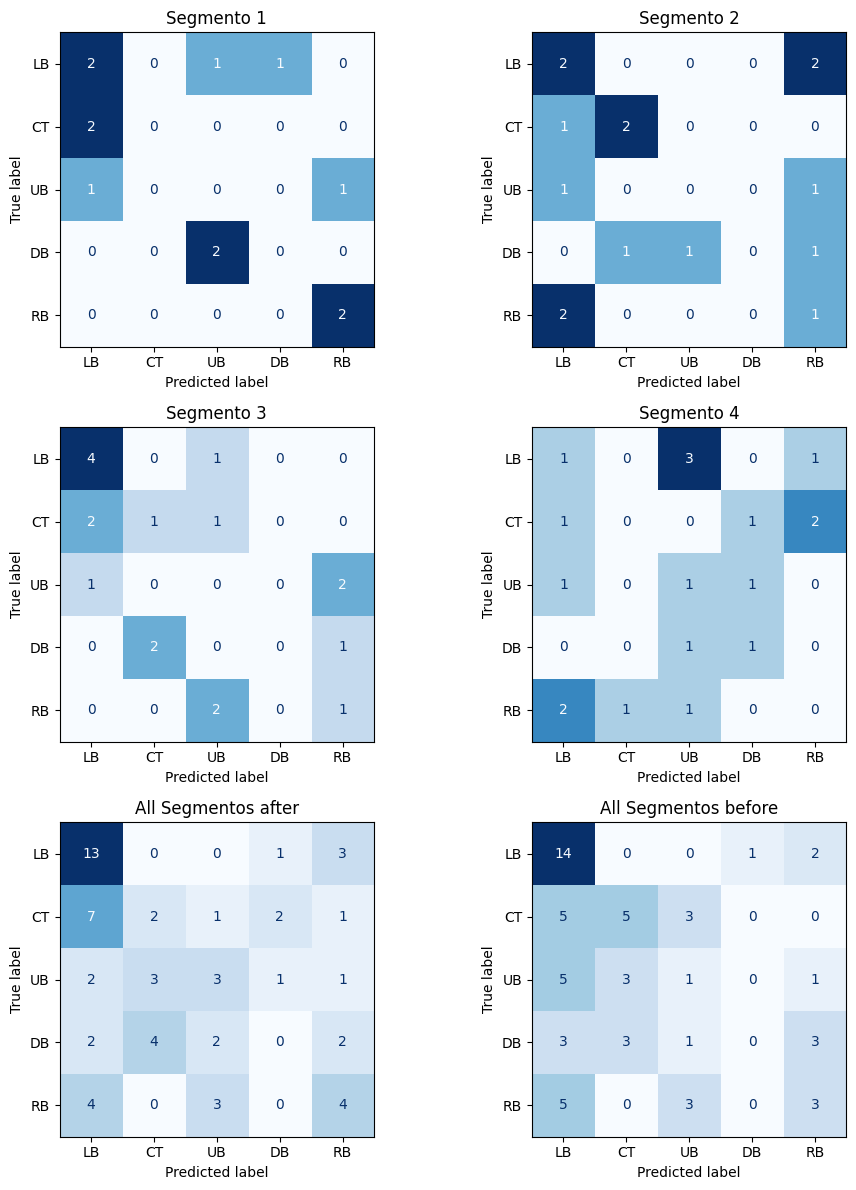

In [24]:
datos_rnn = pd.DataFrame(accuracy_score_rnn, columns=['RNN_VAL'], index=(titulos_all))

display(datos_rnn)

mc_rnn = []

for matrices_rnn in matriz_confusion_rnn:

    mc_rnn.append(pd.DataFrame(matrices_rnn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_rnn[0], mc_rnn[1], mc_rnn[2], mc_rnn[3], mc_rnn[4], mc_rnn[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


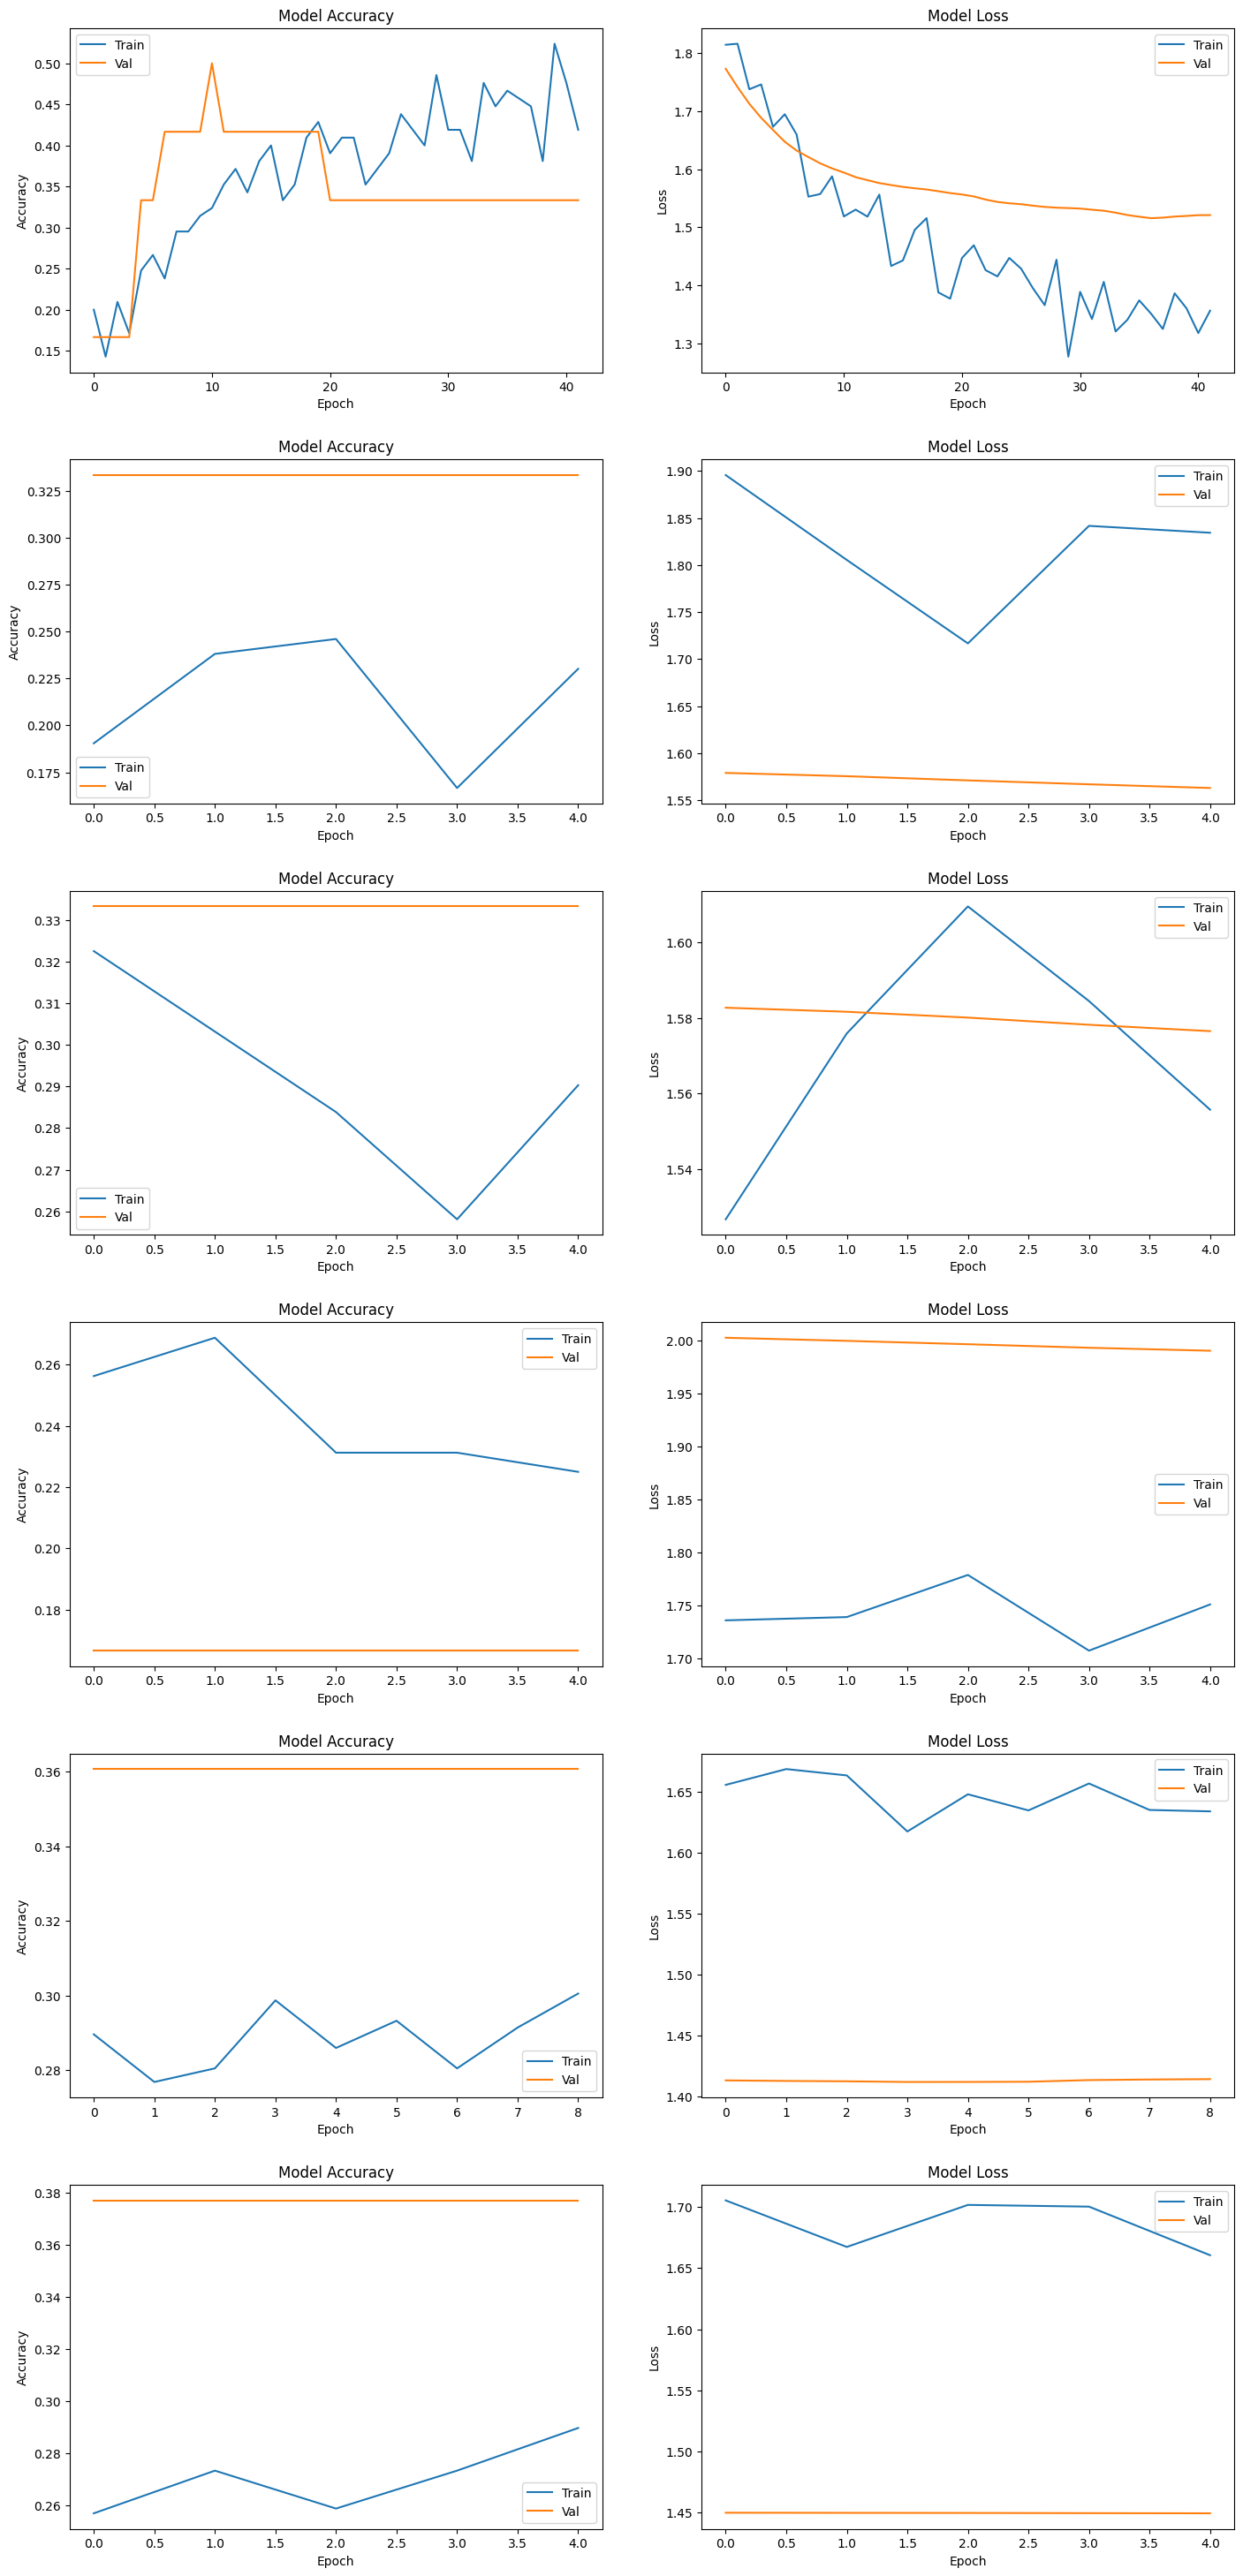

In [25]:

# Crear una figura con 12 subgráficos (6 filas y 2 columnas)
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Asegurarse de que haya suficiente espacio entre los subgráficos
plt.tight_layout(pad=5.0)

# Alternar entre 'loss' y 'accuracy' para cada par de subgráficos
for idx, history in enumerate(total_rnn_trained[:6]):
    i, j = divmod(idx * 2, 2)
    
    # Imprimir la gráfica de pérdida en el primer subgráfico del par
    print_chart(axes[i, j], "Model Accuracy", "Epoch", "Accuracy", 
            [history.history['accuracy'], history.history['val_accuracy']], ['Train', 'Val'])
    # Imprimir la gráfica de precisión (accuracy) en el segundo subgráfico del par
    i, j = divmod(idx * 2 + 1, 2)
    print_chart(axes[i, j], "Model Loss", "Epoch", "Loss", 
                [history.history['loss'], history.history['val_loss']], ['Train', 'Val'])

# Mostrar todas las gráficas en una sola figura
plt.show()


,SRNN_TEST
Segmento 1,0.538462
Segmento 2,0.250000
Segmento 3,0.350000
Segmento 4,0.300000
All Segmentos after,0.411765
All Segmentos before,0.308824


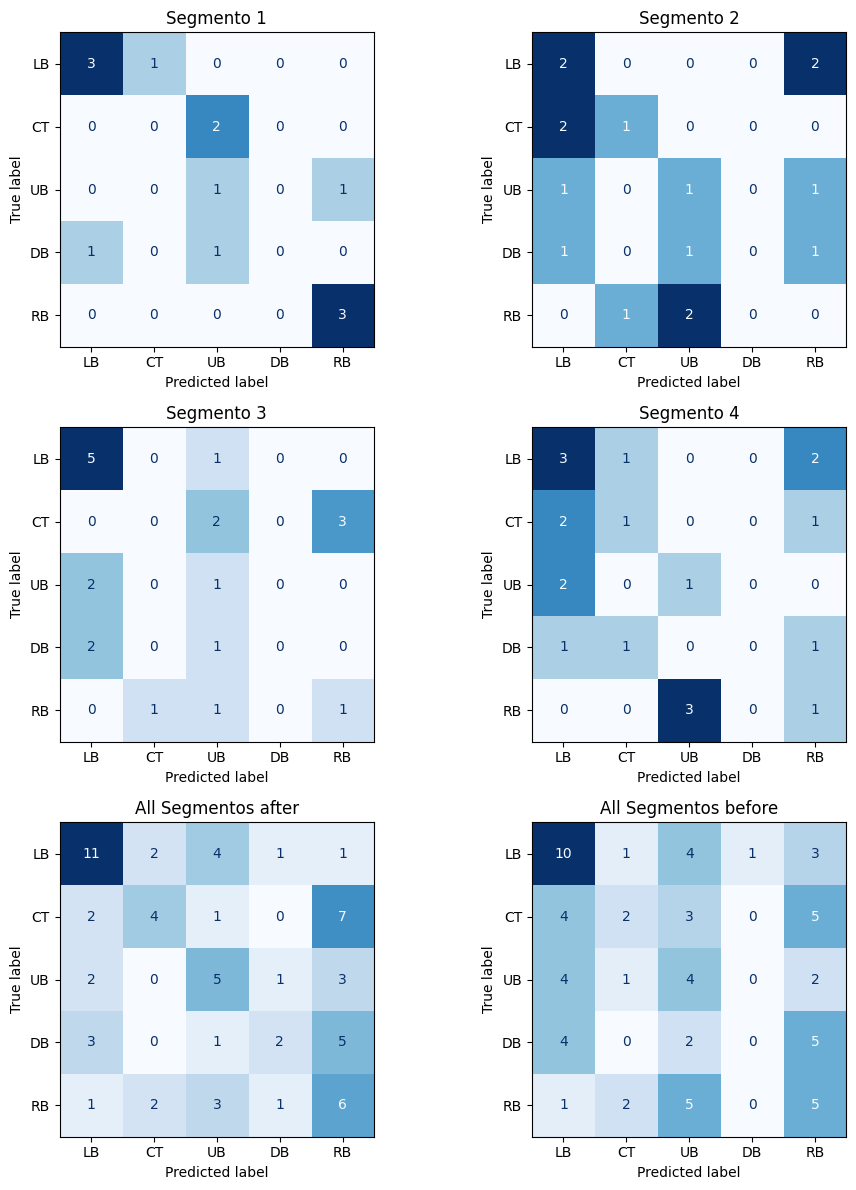

In [26]:
datos_rnn_test = pd.DataFrame(accuracy_score_test_rnn, columns=['SRNN_TEST'], index=(titulos_all))

display(datos_rnn_test)

mc_rnn = []

for matrices_rnn in matriz_confusion_test_rnn:

    mc_rnn.append(pd.DataFrame(matrices_rnn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_rnn[0], mc_rnn[1], mc_rnn[2], mc_rnn[3], mc_rnn[4], mc_rnn[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

In [27]:
datos_rnn_test.to_csv(f'../datos/csv/datosEGG_RNN_test.csv', index=False)
datos_rnn.to_csv(f'../datos/csv/datosEGG_RNN_val.csv', index=False)